In The Name Of GOD

In [1]:
def eval(y_true, y_pred):
    global p
    global r 
    global f_2
    global a

    from sklearn.metrics import accuracy_score
    
    a = accuracy_score(y_true, y_pred)
    print("Accuracy:")
    print(a)

    return a

In [2]:
def accuracy(y_true, y_pred):
    
    """
    Function to calculate accuracy
    -> param y_true: list of true values
    -> param y_pred: list of predicted values
    -> return: accuracy score
    
    """
    
    # Intitializing variable to store count of correctly predicted classes
    correct_predictions = 0
    
    for yt, yp in zip(y_true, y_pred):
        
        if yt == yp:
            
            correct_predictions += 1
    
    #returns accuracy
    return correct_predictions / len(y_true)

In [3]:
import pandas as pd

In [4]:
from sklearn.metrics import classification_report, roc_curve

In [5]:
# Get CSV files list from a folder
train_path = 'D:\\402-1\\مهندسی سیستم ها در حمل و نقل هوشمند\\حل پروژه ها\\4\\dataset\\train_motion_data.csv'  
test_path = 'D:\\402-1\\مهندسی سیستم ها در حمل و نقل هوشمند\\حل پروژه ها\\4\\dataset\\test_motion_data.csv'  

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [6]:
train_df

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,SLOW,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,SLOW,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,SLOW,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,SLOW,3583791


In [7]:
test_df

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.758194,-0.217791,0.457263,0.000000,0.000000,0.000000,AGGRESSIVE,818922
1,0.667560,-0.038610,0.231416,-0.054367,-0.007712,0.225257,AGGRESSIVE,818923
2,2.724449,-7.584121,2.390926,0.023824,0.013668,-0.038026,AGGRESSIVE,818923
3,2.330950,-7.621754,2.529024,0.056810,-0.180587,-0.052076,AGGRESSIVE,818924
4,2.847215,-6.755621,2.224640,-0.031765,-0.035201,0.035277,AGGRESSIVE,818924
...,...,...,...,...,...,...,...,...
3079,-0.713858,-0.652975,-0.164015,-0.147829,-1.309466,0.517250,SLOW,820706
3080,1.514261,0.330070,1.020714,1.321302,1.707598,-0.674548,SLOW,820707
3081,1.280216,-1.735172,-2.332695,0.583376,0.690507,-0.468075,SLOW,820707
3082,0.912313,0.583314,-0.965622,0.235794,0.512745,0.406073,SLOW,820708


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AccX       3644 non-null   float64
 1   AccY       3644 non-null   float64
 2   AccZ       3644 non-null   float64
 3   GyroX      3644 non-null   float64
 4   GyroY      3644 non-null   float64
 5   GyroZ      3644 non-null   float64
 6   Class      3644 non-null   object 
 7   Timestamp  3644 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 227.9+ KB


In [9]:
test_df['Class'].value_counts()

SLOW          1273
NORMAL         997
AGGRESSIVE     814
Name: Class, dtype: int64

In [10]:
import plotly.express as px

labels=["Slow","Normal","Aggressive"]
fig = px.pie(values=train_df['Class'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Different classes in train data")
fig.show()

fig = px.pie(values=test_df['Class'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Different classes in test data")
fig.show()

In [11]:
nan_count = train_df.isna().sum()
print(nan_count)
print("############")
nan_count = test_df.isna().sum()
print(nan_count)

AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64
############
AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64


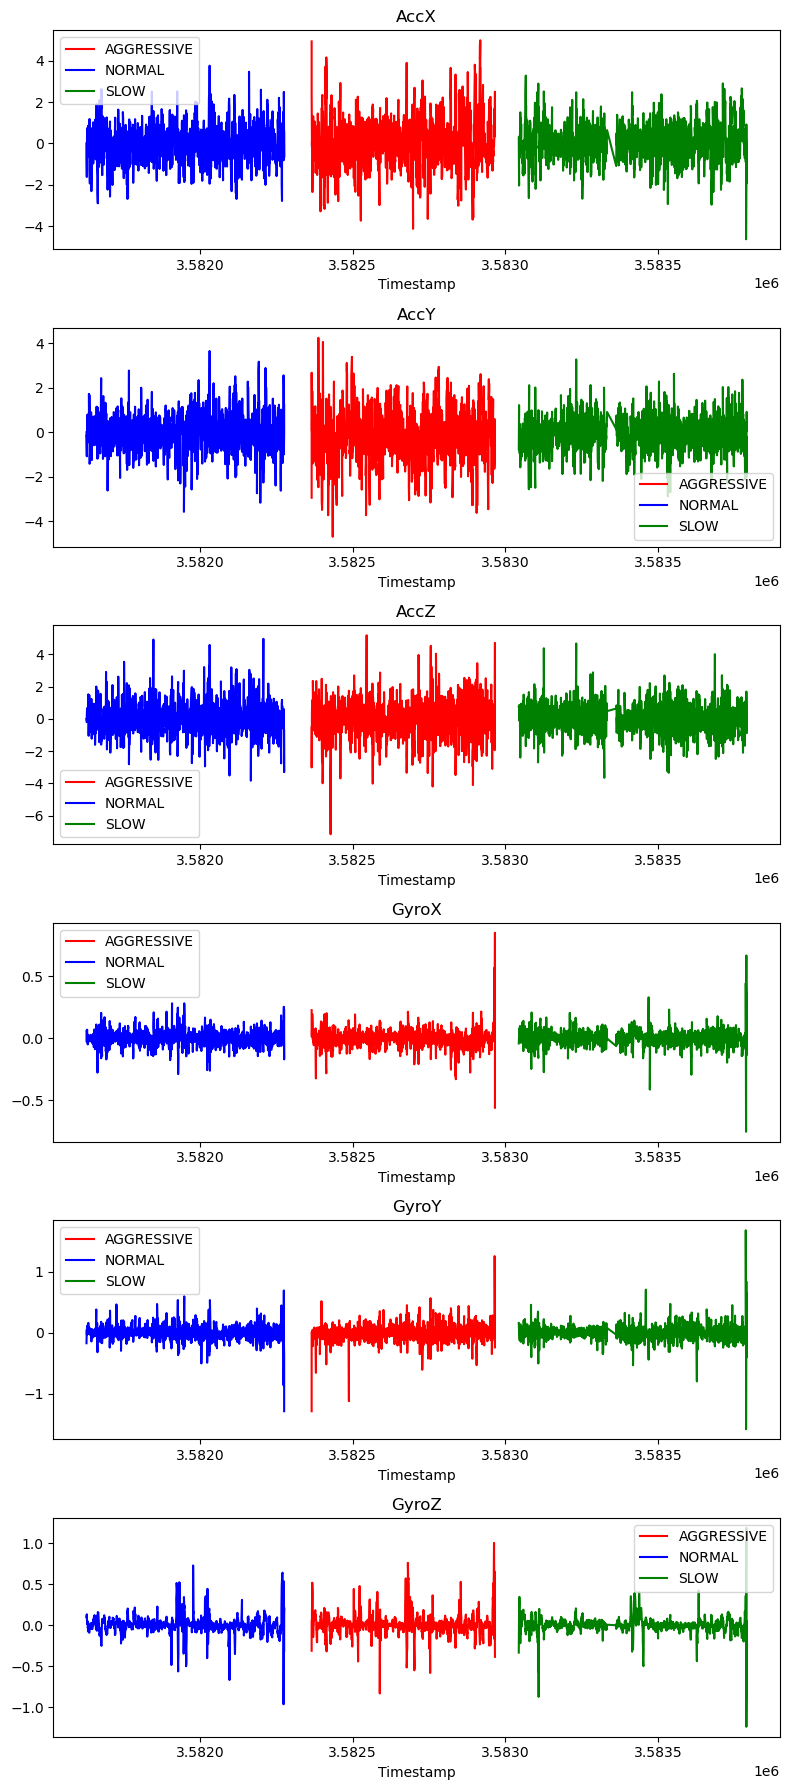

In [12]:
import matplotlib.pyplot as plt

var_columns=['AccX','AccY','AccZ','GyroX','GyroY','GyroZ']
fig,axes=plt.subplots(len(var_columns),1,figsize=(8,3*len(var_columns)))

for ax,column in zip (axes.flatten(),var_columns):
    grouped=train_df.groupby('Class')
    color={'SLOW':'green','NORMAL':'blue','AGGRESSIVE':'red'}
    for key,group in grouped:
        group.plot(ax=ax,x='Timestamp',y=column,label=key,color=color[key])
    ax.set_title(column)
plt.tight_layout()

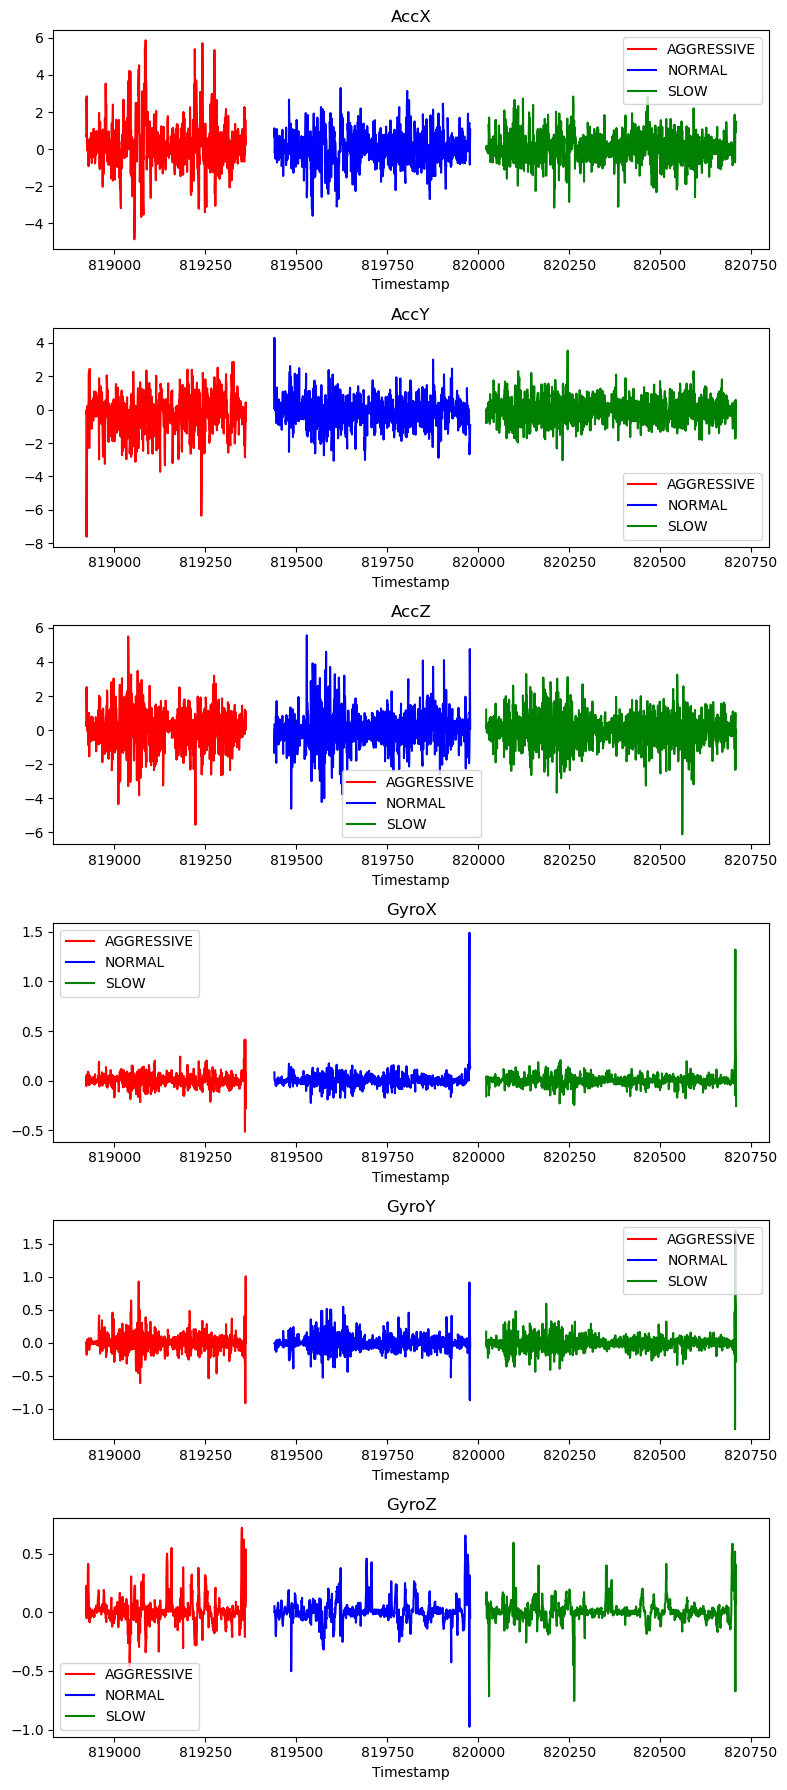

In [13]:
import matplotlib.pyplot as plt

var_columns=['AccX','AccY','AccZ','GyroX','GyroY','GyroZ']
fig,axes=plt.subplots(len(var_columns),1,figsize=(8,3*len(var_columns)))

for ax,column in zip (axes.flatten(),var_columns):
    grouped=test_df.groupby('Class')
    color={'SLOW':'green','NORMAL':'blue','AGGRESSIVE':'red'}
    for key,group in grouped:
        group.plot(ax=ax,x='Timestamp',y=column,label=key,color=color[key])
    ax.set_title(column)
plt.tight_layout()

In [14]:
train_df['Class']

0       NORMAL
1       NORMAL
2       NORMAL
3       NORMAL
4       NORMAL
         ...  
3639      SLOW
3640      SLOW
3641      SLOW
3642      SLOW
3643      SLOW
Name: Class, Length: 3644, dtype: object

In [15]:
train_df.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
count,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3.644000e+03
mean,0.040467,-0.073418,0.008271,0.001593,-0.001273,0.007949,3.582707e+06
std,0.985653,0.903408,0.985061,0.066918,0.126205,0.115687,6.421479e+02
min,-4.636523,-4.699795,-7.143998,-0.751822,-1.587028,-1.236468,3.581629e+06
25%,-0.550695,-0.592540,-0.558464,-0.028558,-0.053756,-0.029398,3.582121e+06
50%,0.003931,-0.080833,0.002262,0.001985,-0.001833,0.002978,3.582702e+06
75%,0.595987,0.452401,0.556157,0.031918,0.051313,0.040852,3.583270e+06
max,4.985548,4.245151,5.171739,0.849255,1.679879,1.190500,3.583791e+06


In [16]:
#Scale

from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']
train_data_to_scale = train_df[columns_to_scale]
test_data_to_scale = test_df[columns_to_scale]

scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_data_to_scale)
scaled_test_data = scaler.transform(test_data_to_scale)

# Replace the original columns with the scaled values
train_df[columns_to_scale] = scaled_train_data
test_df[columns_to_scale] = scaled_test_data

In [17]:
train_df.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
count,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3.644000e+03
mean,0.486069,0.517206,0.580742,0.470567,0.485399,0.512745,3.582707e+06
std,0.102437,0.100996,0.079984,0.041795,0.038631,0.047667,6.421479e+02
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.581629e+06
25%,0.424631,0.459171,0.534725,0.451736,0.469334,0.497357,3.582121e+06
50%,0.482272,0.516377,0.580254,0.470813,0.485228,0.510697,3.582702e+06
75%,0.543803,0.575990,0.625229,0.489508,0.501496,0.526303,3.583270e+06
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.583791e+06


In [18]:
#drop timestamp column
train_df = train_df.drop(['Timestamp'], axis=1)
test_df = test_df.drop(['Timestamp'], axis=1)

In [19]:
#convert categorical column to numeric

class_mapping = {'SLOW': 0, 'NORMAL': 1, 'AGGRESSIVE': 2}
train_df['Class'] = train_df['Class'].replace(class_mapping)
test_df['Class'] = test_df['Class'].replace(class_mapping)

train_df

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class
0,0.481863,0.525413,0.580071,0.506677,0.432311,0.551472,1
1,0.312995,0.404396,0.563492,0.451736,0.501496,0.565316,1
2,0.420062,0.511729,0.597975,0.457459,0.476814,0.545683,1
3,0.558612,0.499873,0.634289,0.513163,0.476627,0.532092,1
4,0.492437,0.612342,0.574652,0.488745,0.484667,0.532092,1
...,...,...,...,...,...,...,...
3639,0.577029,0.299868,0.717091,0.750858,0.603590,0.000000,0
3640,0.280846,0.627697,0.572275,0.670355,0.684555,0.312862,0
3641,0.458704,0.608958,0.508014,0.695155,0.361257,0.531840,0
3642,0.445549,0.532933,0.612092,0.386875,0.491960,0.507425,0


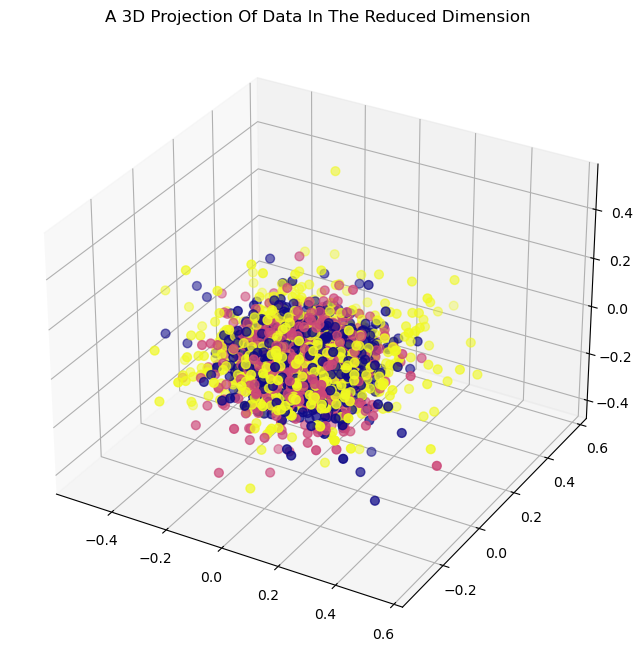

In [20]:
#PCA

from sklearn.decomposition import PCA

y = train_df['Class']
pca = PCA(n_components=3)
X = train_df.drop(['Class'],axis=1)
X = pca.fit_transform(X)

X = pd.DataFrame(X, columns=(["col1","col2", "col3"]))

#A 3D Projection Of Data In The Reduced Dimension
import matplotlib
import matplotlib.pyplot as plt

z_1 =X["col1"]
z_2 =X["col2"]
z_3 =X["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(z_1,z_2,z_3, s=40, c=y , marker="o", cmap = "plasma" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [21]:
y_train = train_df['Class']
X_train = train_df.drop(['Class'],axis = 1)

y_test = test_df['Class']
X_test = test_df.drop(['Class'],axis = 1)

In [22]:
report = []

In [23]:
#Gausssian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

d = []
d.append(eval(y_test, y_pred_gnb))
d.insert(0,"Gaussain Naive Bayes")
report.append(d)

Accuracy:
0.44260700389105057


In [24]:
#list of classes that model predict on test data
import numpy as np
np.unique(y_pred_gnb)

array([0, 1, 2], dtype=int64)

In [25]:
#list of classes that model saw in train data
gnb.classes_

array([0, 1, 2], dtype=int64)

Accuracy:
0.3651102464332036


[Text(0.45304303476322444, 0.9868421052631579, 'x[1] <= 0.419\ngini = 0.665\nsamples = 3644\nvalue = [1331, 1200, 1113]'),
 Text(0.06396831415231807, 0.9605263157894737, 'x[1] <= 0.343\ngini = 0.618\nsamples = 469\nvalue = [110, 118, 241]'),
 Text(0.020757129687453534, 0.9342105263157895, 'x[0] <= 0.448\ngini = 0.502\nsamples = 158\nvalue = [24, 29, 105]'),
 Text(0.008207690248907128, 0.9078947368421053, 'x[1] <= 0.201\ngini = 0.608\nsamples = 79\nvalue = [19, 18, 42]'),
 Text(0.007256073988164273, 0.881578947368421, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11]'),
 Text(0.009159306509649984, 0.881578947368421, 'x[0] <= 0.186\ngini = 0.644\nsamples = 68\nvalue = [19, 18, 31]'),
 Text(0.008207690248907128, 0.8552631578947368, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.01011092277039284, 0.8552631578947368, 'x[2] <= 0.553\ngini = 0.635\nsamples = 65\nvalue = [16, 18, 31]'),
 Text(0.0038064650429714218, 0.8289473684210527, 'x[4] <= 0.487\ngini = 0.608\nsamples = 21\nvalue = [1

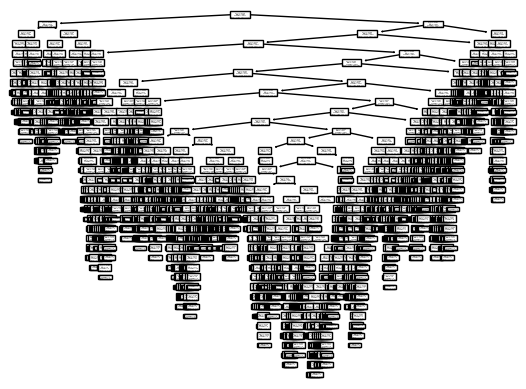

In [26]:
#Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)

d = []
d.append(eval(y_test, y_pred_dt))
d.insert(0,"Desicion Tree")
report.append(d)

tree.plot_tree(dtree)

In [27]:
np.unique(y_pred_dt)

array([0, 1, 2], dtype=int64)

In [28]:
#SVM with Linear kernel
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test)

d = []
d.append(eval(y_test, y_pred_svm))
d.insert(0,"SVM(linear kernel)")
report.append(d)



Accuracy:
0.41277561608300906


In [29]:
#SVM with polynomial kernel
p_svm_clf = SVC(kernel='poly')

p_svm_clf.fit(X_train, y_train)

y_pred_p_svm = p_svm_clf.predict(X_test)

d = []
d.append(eval(y_test, y_pred_p_svm))
d.insert(0,"SVM(polynomial kernel)")
report.append(d)

Accuracy:
0.4584954604409857


In [30]:
#SVM with gaussian RBF kernel
g_svm_clf = SVC(kernel='rbf')

g_svm_clf.fit(X_train, y_train)

y_pred_g_svm = g_svm_clf.predict(X_test)

d = []
d.append(eval(y_test, y_pred_g_svm))
d.insert(0,"SVM(gaussian RBF kernel)")
report.append(d)

Accuracy:
0.46400778210116733


In [31]:
# Hyperparameter tuning for a Random Forest Classifier
import numpy as np

n_estimators = [5, 20, 50, 100, 1000] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# Setting and running a search for the best parameters
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\QOMASUS.COM\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100, 1000]},
                   random_state=35, verbose=2)

In [33]:
#Random Forest Classifier
randmf = RandomForestClassifier(n_estimators = 50, min_samples_split = 6, min_samples_leaf= 3, max_features = 'sqrt', max_depth= 10, bootstrap=True) 
randmf.fit( X_train, y_train)

# Get the predictions
y_pred_rf=randmf.predict(X_test)
from sklearn import metrics

d = []
d.append(eval(y_test, y_pred_rf))
d.insert(0,"Random forest")
report.append(d)


Accuracy:
0.45363164721141375


In [34]:
##############################Report##################################

report_df = pd.DataFrame(report, columns=['Method', 'Accuracy'])
report_df


,Method,Accuracy
0,Gaussain Naive Bayes,0.442607
1,Desicion Tree,0.365110
2,SVM(linear kernel),0.412776
3,SVM(polynomial kernel),0.458495
4,SVM(gaussian RBF kernel),0.464008
5,Random forest,0.453632
